In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

In [2]:
df = pd.read_csv('DATA/fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


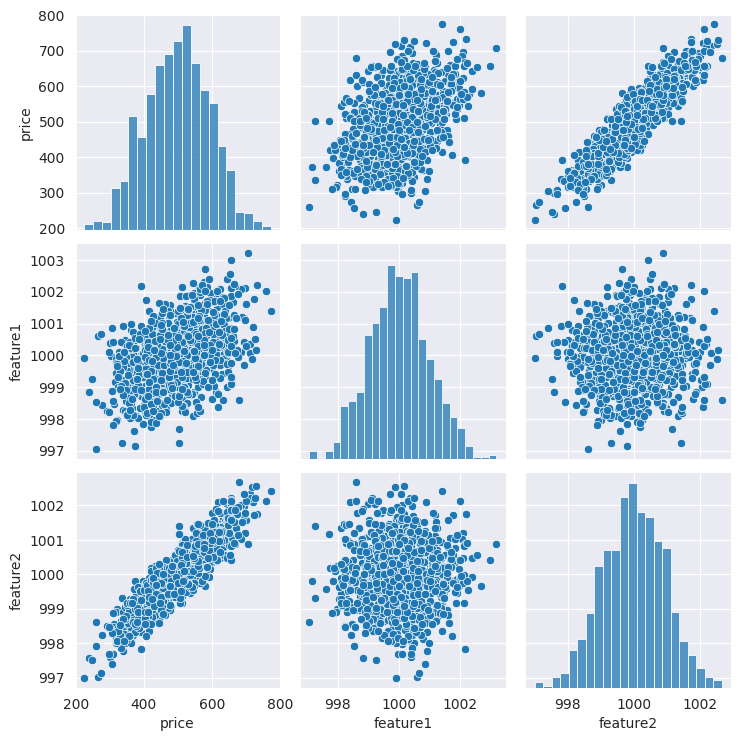

In [4]:
sns.pairplot(df)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df[['feature1', 'feature2']].values
y = df['price'].values

In [7]:
type(X)

numpy.ndarray

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
X_train.shape

(700, 2)

In [10]:
X_test.shape

(300, 2)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bo

In [13]:
scaler = MinMaxScaler()

In [14]:
scaler.fit(X_train)

MinMaxScaler()

In [15]:
X_train = scaler.transform(X_train)

In [16]:
X_test = scaler.transform(X_test)

In [17]:
X_train.max()

1.0

In [18]:
X_train.min()

0.0

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2023-02-20 22:05:05.744429: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-02-20 22:05:05.768929: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-02-20 22:05:05.769433: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-20 22:05:06.401526: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [20]:
help(Sequential)

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Se

In [21]:
# model = Sequential([
#     Dense(4, activation='relu'),
#     Dense(2, activation='relu'),
#     Dense(1)
# ])

In [22]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

In [23]:
model.fit(X_train, y_train, epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 836us/step - loss: 256260.2500
Epoch 2/250
22/22 [==============================] - 0s 693us/step - loss: 255950.6562
Epoch 3/250
22/22 [==============================] - 0s 752us/step - loss: 255601.9844
Epoch 4/250
22/22 [==============================] - 0s 709us/step - loss: 255188.7812
Epoch 5/250
22/22 [==============================] - 0s 636us/step - loss: 254701.6875
Epoch 6/250
22/22 [==============================] - 0s 627us/step - loss: 254138.9531
Epoch 7/250
22/22 [==============================] - 0s 651us/step - loss: 253491.6875
Epoch 8/250
22/22 [==============================] - 0s 636us/step - loss: 252756.6094
Epoch 9/250
22/22 [==============================] - 0s 686us/step - loss: 251925.1875
Epoch 10/250
22/22 [==============================] - 0s 605us/step - loss: 250990.4688
Epoch 11/250
22/22 [==============================] - 0s 642us/step - loss: 249940.6094
Epoch 12/250
22/22 [=====================

In [24]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot: >

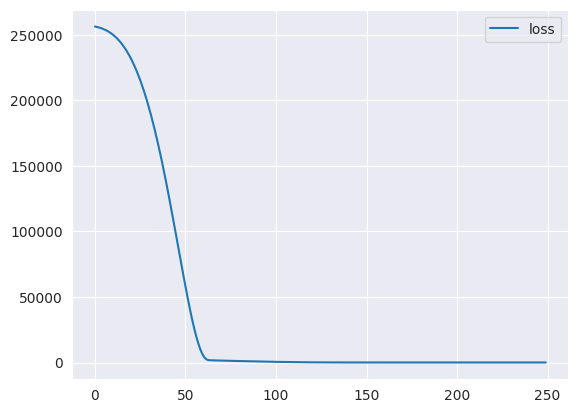

In [25]:
loss_df.plot()

In [26]:
model.evaluate(X_test, y_test, verbose=0)

27.70086669921875

In [27]:
model.evaluate(X_train, y_train, verbose=0)

25.204023361206055

In [28]:
predictions = model.predict(X_test)

10/10 [==============================] - 0s 566us/step


In [29]:
predictions = pd.Series(predictions.reshape(300,))

In [32]:
pred_df = pd.DataFrame(zip(y_test, predictions), columns=['True y', 'Predictions'])

In [33]:
pred_df

,True y,Predictions
0,402.296319,406.515594
1,624.156198,625.445129
2,582.455066,593.955688
3,578.588606,573.935059
4,371.224104,367.651520
...,...,...
295,525.704657,530.624756
296,502.909473,516.784912
297,612.727910,611.521851
298,417.569725,418.250336


<AxesSubplot: xlabel='True y', ylabel='Predictions'>

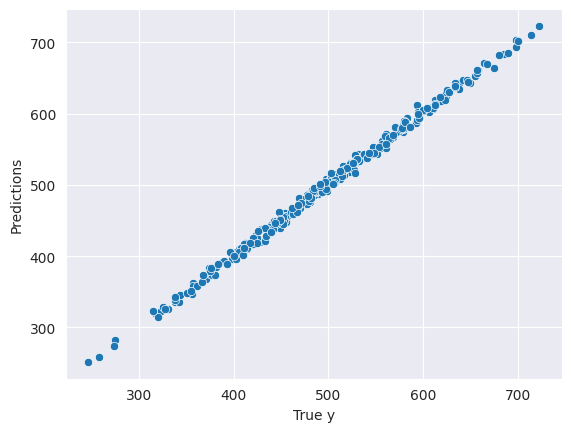

In [34]:
sns.scatterplot(data=pred_df, x='True y', y='Predictions')

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [36]:
mean_absolute_error(pred_df["True y"], pred_df["Predictions"])

4.272070282220677

In [37]:
mean_squared_error(pred_df["True y"], pred_df["Predictions"])

27.700870229347018

In [38]:
new_gem = [[998, 1000]]

In [39]:
scaled_new_gem = scaler.transform(new_gem)

In [40]:
model.predict(scaled_new_gem)

1/1 [==============================] - 0s 17ms/step


array([[420.8918]], dtype=float32)

In [41]:
from tensorflow.keras.models import load_model

In [42]:
model.save('my_gem_model.h5')

In [43]:
later_model = load_model('my_gem_model.h5')

In [44]:
later_model.predict(scaled_new_gem)

1/1 [==============================] - 0s 44ms/step


array([[420.8918]], dtype=float32)